In [1]:
# Density and Contour Plots 

%matplotlib inline 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-white")
import numpy as np 

/tmp/ipykernel_437543/2892906804.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


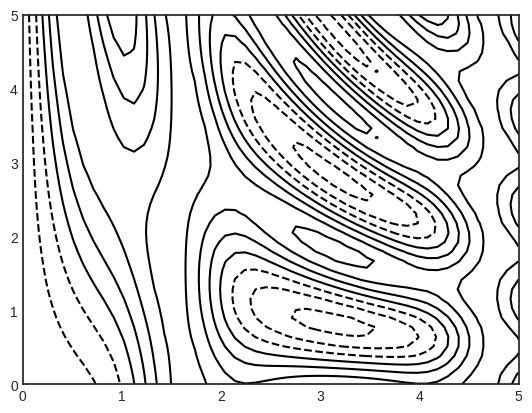

In [3]:
# Visualizing a Three-Dimensional Function 
def f(x,y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0,5,50)
y = np.linspace(0,5,40)
X, Y = np.meshgrid(x,y)
Z = f(X,Y)

plt.contour(X,Y,Z, colors="black")

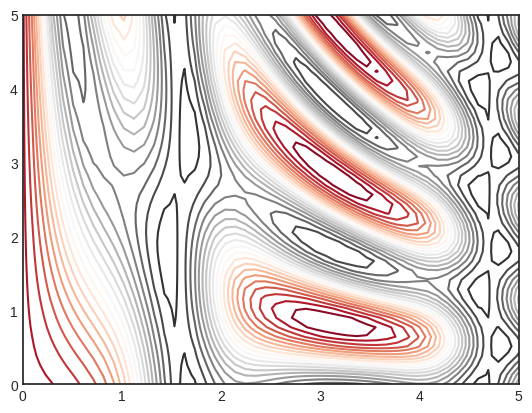

In [4]:
plt.contour(X,Y,Z, 20, cmap="RdGy")

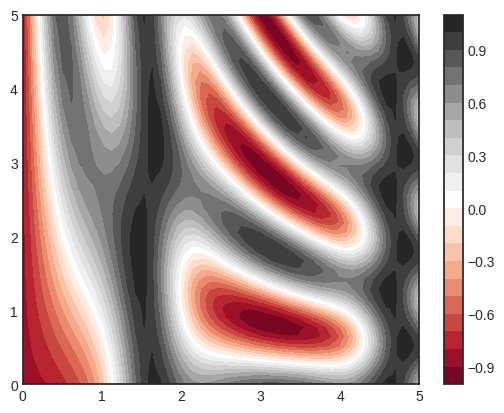

In [5]:
plt.contourf(X,Y,Z, 20, cmap="RdGy")
plt.colorbar();

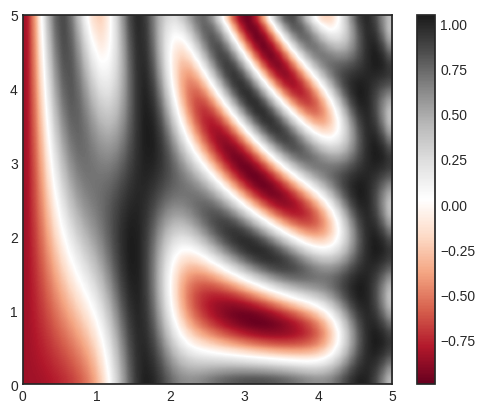

In [6]:
plt.imshow(Z, extent=[0,5,0,5], origin="lower", cmap="RdGy",
           interpolation="gaussian", aspect="equal")
plt.colorbar()

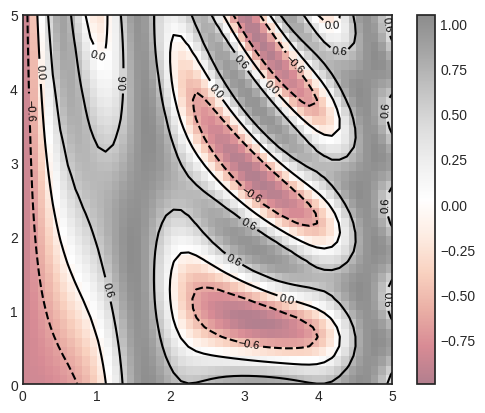

In [7]:
contours = plt.contour(X,Y,Z, 3, colors="black")
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0,5,0,5], origin="lower",
           cmap="RdGy", alpha=0.5)
plt.colorbar();

/tmp/ipykernel_437543/974835836.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


(array([  6.,  17.,  71., 170., 245., 246., 157.,  67.,  17.,   4.]),
 array([-3.26668015, -2.60694432, -1.94720849, -1.28747266, -0.62773683,
         0.031999  ,  0.69173484,  1.35147067,  2.0112065 ,  2.67094233,
         3.33067816]),
 <BarContainer object of 10 artists>)

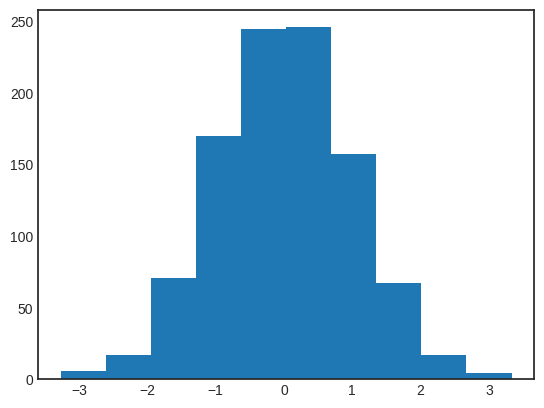

In [8]:
# Histograms, Binnings, and Density

%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-white")

rng = np.random.default_rng(1701)
data = rng.normal(size=1000)

plt.hist(data)

(array([0.00909455, 0.00909455, 0.00909455, 0.01364182, 0.00454727,
        0.05911457, 0.06820912, 0.11368187, 0.14096551, 0.20917463,
        0.27738375, 0.2864783 , 0.3228565 , 0.39106562, 0.40016017,
        0.38651834, 0.3228565 , 0.40925472, 0.2864783 , 0.24100555,
        0.18643826, 0.10913459, 0.13187096, 0.06366184, 0.03183092,
        0.0181891 , 0.02728365, 0.00909455, 0.00454727, 0.00454727]),
 array([-3.26668015, -3.04676821, -2.82685626, -2.60694432, -2.38703238,
        -2.16712043, -1.94720849, -1.72729655, -1.5073846 , -1.28747266,
        -1.06756071, -0.84764877, -0.62773683, -0.40782488, -0.18791294,
         0.031999  ,  0.25191095,  0.47182289,  0.69173484,  0.91164678,
         1.13155872,  1.35147067,  1.57138261,  1.79129455,  2.0112065 ,
         2.23111844,  2.45103039,  2.67094233,  2.89085427,  3.11076622,
         3.33067816]),
 [<matplotlib.patches.Polygon at 0x7b177d2d2e50>])

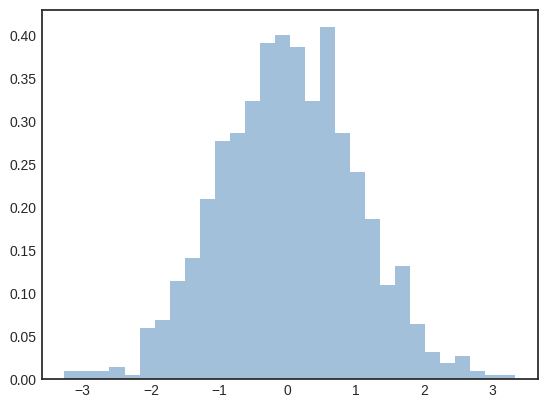

In [9]:
plt.hist(
    data, 
    bins=30, 
    density=True,
    alpha=0.5,
    histtype="stepfilled",
    color="steelblue",
    edgecolor="none"
)

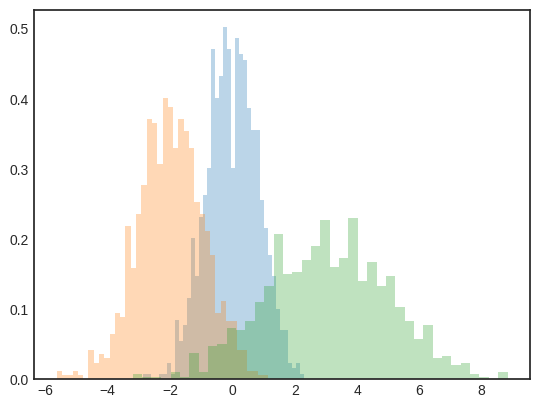

In [10]:
x1 = rng.normal(0,0.8, 1000)
x2 = rng.normal(-2,1,1000)
x3 = rng.normal(3,2,1000)

# общие параметры для отображения - которые развернуться 
# с помощью **kwards 
kwards = dict(
    histtype="stepfilled",
    alpha=0.3,
    density=True,
    bins=40
)

plt.hist(x1, **kwards)
plt.hist(x2, **kwards)
plt.hist(x3, **kwards);


In [11]:
counts, bin_edges = np.histogram(data, bins=5)
counts 

array([ 23, 241, 491, 224,  21])

In [12]:
# Two-Dimensional Histogram and Binnings 
mean = [0,0]
cov = [[1,1], [1,2]]
x,y = rng.multivariate_normal(mean, cov, 10_000).T

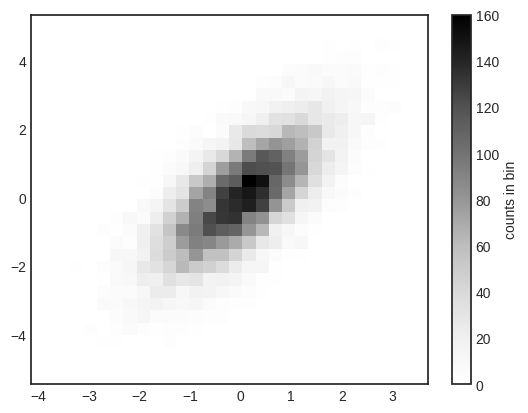

In [13]:
# plt.hist2d: Two-Dimensional Histogram
plt.hist2d(x,y,bins=30)
cb = plt.colorbar()
cb.set_label("counts in bin")

In [14]:
counts, xedges, yedges = np.histogram2d(x,y,bins=30)
counts.shape

(30, 30)

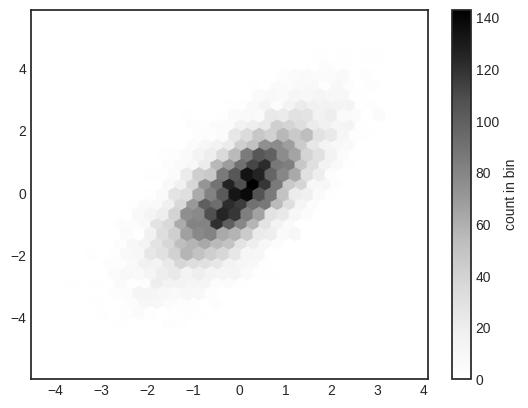

In [15]:
# plt.hexbin: Hexagonal Binning
plt.hexbin(x,y,gridsize=30)
cb = plt.colorbar(label="count in bin")

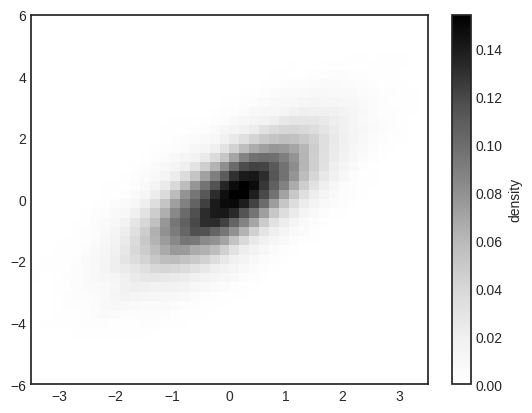

In [17]:
# Kernel Density Estimation (KDE)

from scipy.stats import gaussian_kde

# fit an array of size [Ndim,Nsamples]
data = np.vstack([x,y])
kde = gaussian_kde(data)

# evaluate on a regular grid 
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6,6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(
    np.vstack([Xgrid.ravel(), Ygrid.ravel()])
)

# Plot the result as an image 
plt.imshow(Z.reshape(Xgrid.shape),
           origin="lower", aspect="auto",
           extent=[-3.5, 3.5, -6, 6])
cb = plt.colorbar()
cb.set_label("density")
